# Importar Librerias

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import signal
from scipy.signal import find_peaks, peak_widths
from astropy.io import fits
import imageio as io

# Abrir la imagen de SDO

Text(0.5, 1.0, 'Imagen tomada por SDO')

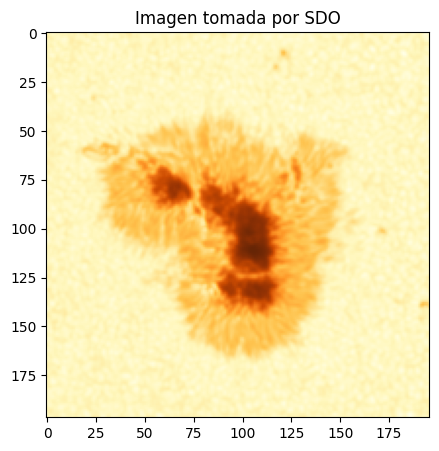

In [36]:
hduf_total = fits.getdata('./submap.hmi.ic_720s.20230611_113600_TAI.3.continuum.fits')
ints = np.flipud(np.nan_to_num(hduf_total, copy=True, nan=0.0))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)


ax1.imshow(ints,cmap='YlOrBr_r')
ax1.set_title('Imagen tomada por SDO')

# Aperturas

In [37]:
im_size = len(ints)

#create circular aperture mask
x = np.arange(0, im_size)
y = np.arange(0, im_size)
arr = np.zeros((y.size, x.size))
diam = im_size
r= diam/2
mask = (x[np.newaxis,:]-im_size/2)**2 + (y[:,np.newaxis]-im_size/2)**2 < r**2

In [38]:
##########################################################
##########################################################

# APERTURA DEL TELESCOPIO A SIMULAR #######################

D = 4 #cm

##########################################################
##########################################################

Text(0.5, 1.0, 'Apertura a Analizar 10 cm / 140 Pixeles')

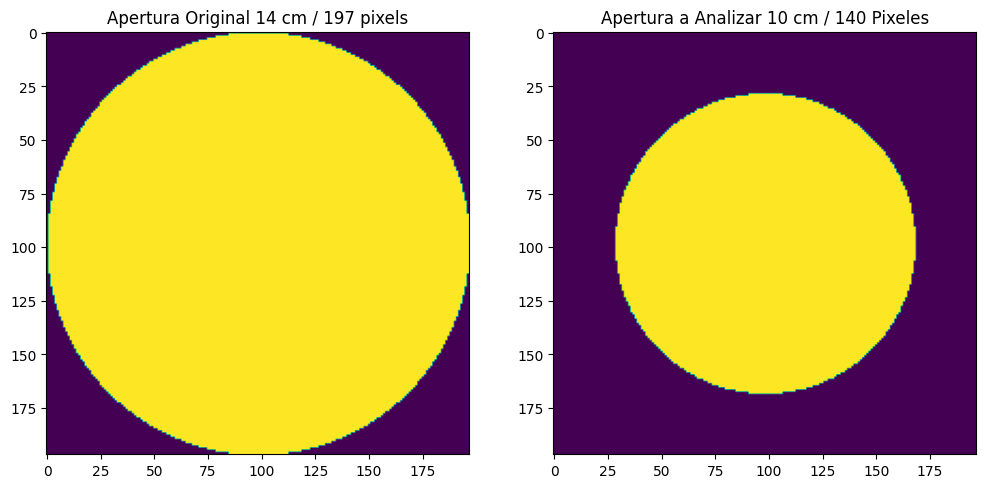

In [39]:
size_telescope = (D*len(ints))//14
mask1 = (x[np.newaxis,:]-im_size/2)**2 + (y[:,np.newaxis]-im_size/2)**2 < (size_telescope//2)**2

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.imshow(mask)
ax1.set_title('Apertura Original 14 cm / '+str(im_size)+' pixels')
ax2.imshow(mask1)
ax2.set_title('Apertura a Analizar '+str(D)+' cm / '+str(size_telescope)+' Pixeles')

# Point Spread Function PSF

In [40]:
Collimated_Pupil_padded = np.pad(mask1,pad_width=0,mode='constant')
print(Collimated_Pupil_padded.shape)

f = np.fft.fft2(Collimated_Pupil_padded) #must be complex amplitude going in here
fshift = np.fft.fftshift(f)
intensity_image = (np.abs(fshift))**2

(197, 197)


squaree lenght:  19


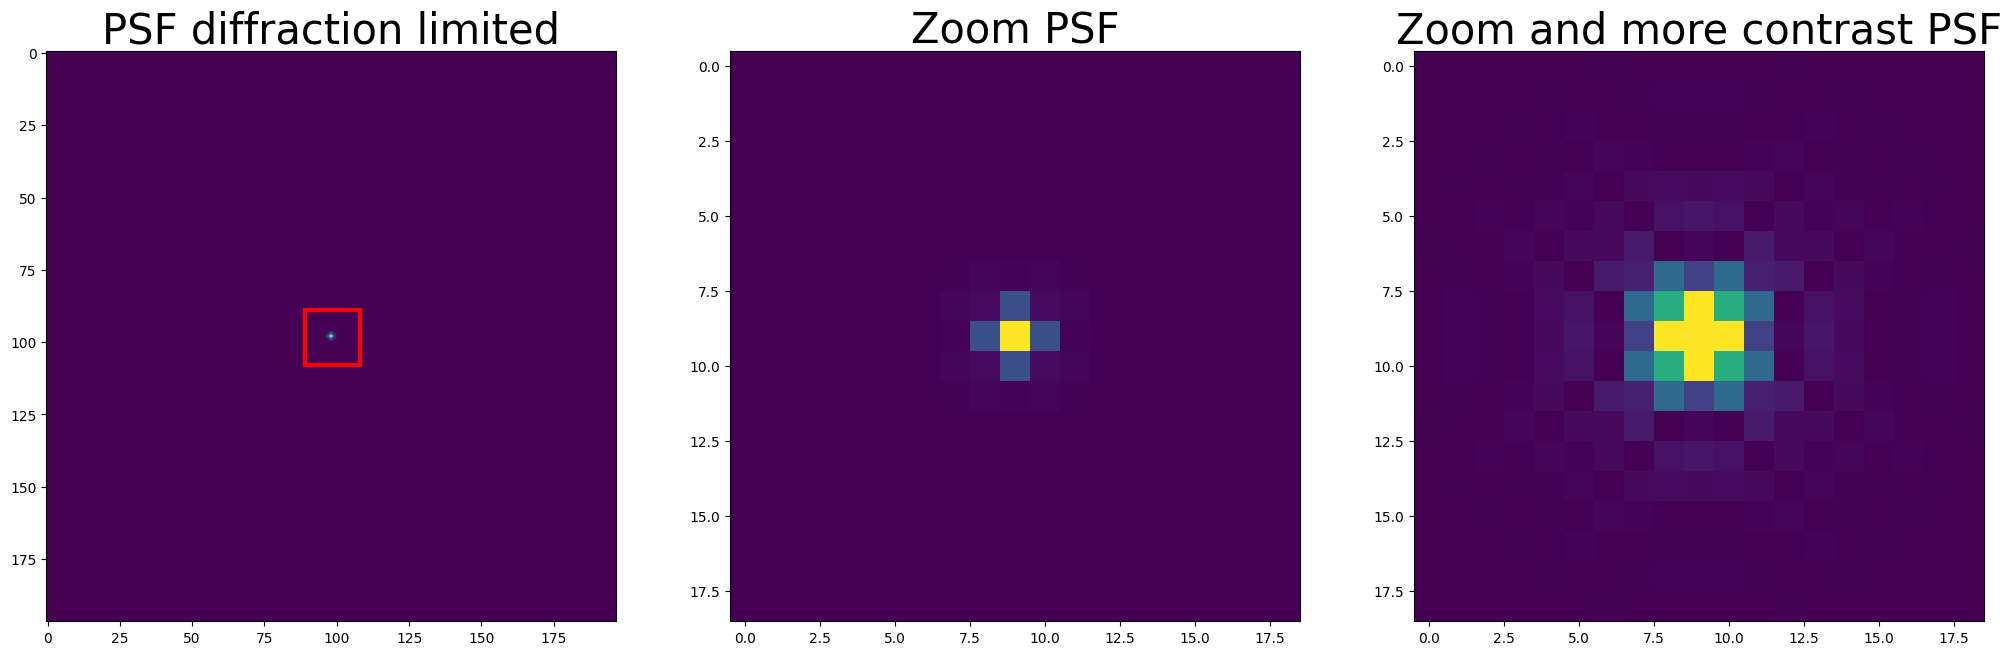

In [41]:
size = len(Collimated_Pupil_padded)

sq_lenght_pd = int((10*size)/100)
print('squaree lenght: ',sq_lenght_pd)
x_pd = size/2 - sq_lenght_pd/2
y_pd = x_pd

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(25,15))
plt.set_cmap('viridis')
ax[0].imshow(intensity_image)
#ax[0].set_title('PSF r0 = %i cm'%r0_cm,fontsize=40)
ax[0].set_title('PSF diffraction limited',fontsize=30)
rect_pd = patches.Rectangle((x_pd,y_pd), sq_lenght_pd, sq_lenght_pd, linewidth=3, edgecolor='r', facecolor='none')
ax[0].add_patch(rect_pd)

ax[1].imshow(intensity_image[int(y_pd):int(y_pd)+sq_lenght_pd,int(x_pd):int(x_pd)+sq_lenght_pd],vmax=np.max(intensity_image),vmin=np.min(intensity_image))
ax[1].set_title('Zoom PSF',fontsize=30)

ax[2].imshow(intensity_image[int(y_pd):int(y_pd)+sq_lenght_pd,int(x_pd):int(x_pd)+sq_lenght_pd],vmax=np.max(intensity_image)*0.05,vmin=np.min(intensity_image))
ax[2].set_title('Zoom and more contrast PSF',fontsize=30)

plt.show()


# Convolucion PSF con Imagen Original

In [42]:
convolved_array = signal.convolve(ints, intensity_image*(1/np.max(intensity_image)),mode='same', method='auto')

Text(0.5, 1.0, 'Convolved Image 10 cm')

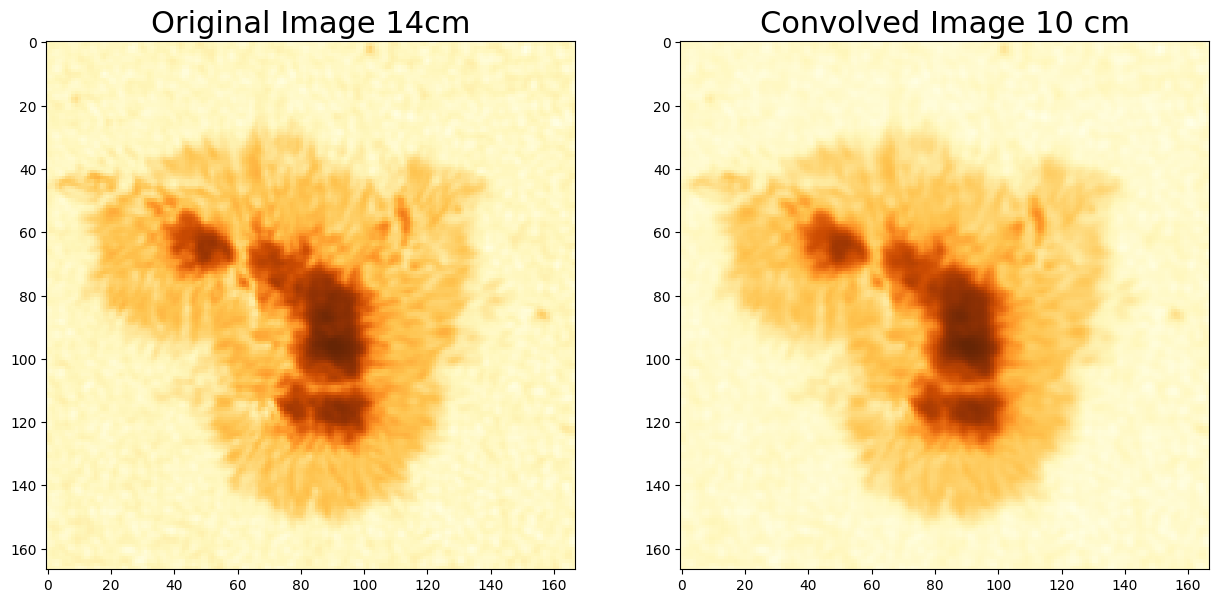

In [43]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

cut = 30//2
ax1.imshow(ints[cut:len(ints)-cut,cut:len(ints)-cut],cmap='YlOrBr_r')
ax1.set_title('Original Image 14cm',fontsize=22)
ax2.imshow(convolved_array[cut:len(convolved_array)-cut,cut:len(convolved_array)-cut],cmap='YlOrBr_r')
ax2.set_title('Convolved Image '+str(D)+' cm',fontsize=22)



# Imagen tomada por nosotros

In [44]:
fname = './20231106115053.jpg'
im = io.imread(fname)
print(im.shape)

rgb_img = np.array(im)
im = np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])
print(im.shape)

rows = im.shape[0]
columns = im.shape[1]
print('rows: ',rows)
print('columns: ',columns)

(480, 640, 3)
(480, 640)
rows:  480
columns:  640


/tmp/ipykernel_14826/1071324957.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = io.imread(fname)


Text(0.5, 1.0, 'Zoom sunspot')

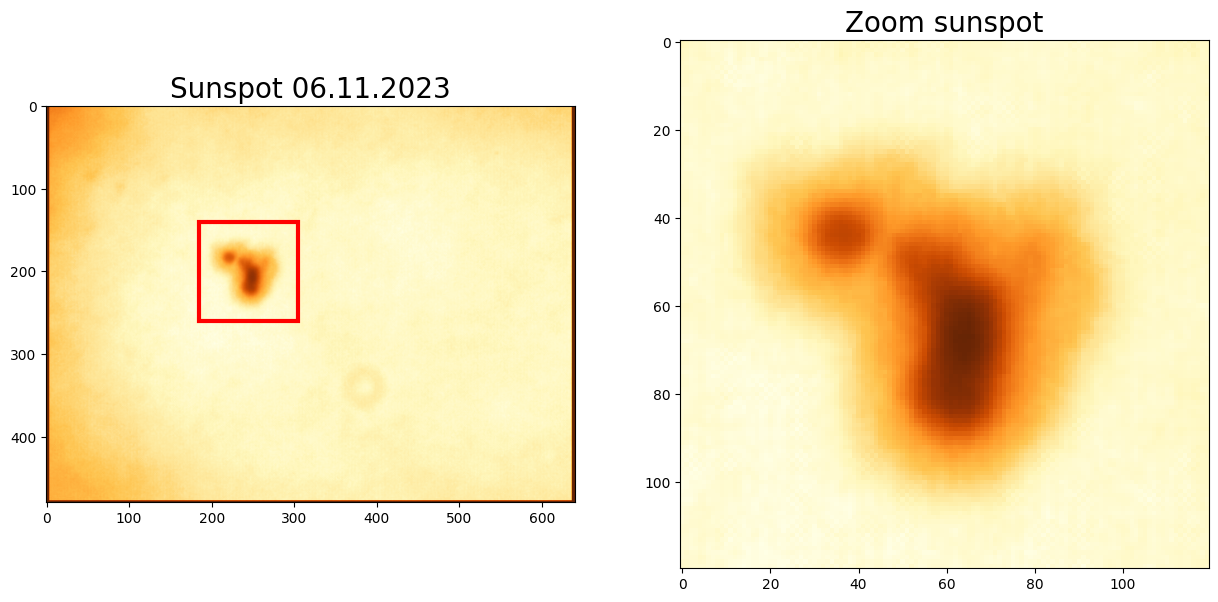

In [45]:
im_array_size= int(len(im))
im_array_size
#sq_lenght= len(ints)
sq_lenght = 120
x_p = 245
y_p = 200
x = int(x_p - sq_lenght/2)
y = int(y_p - sq_lenght/2)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,15))
plt.set_cmap('viridis')
ax[0].imshow(im,cmap='YlOrBr_r')
ax[0].set_title('Sunspot 06.11.2023',fontsize=20)
rect = patches.Rectangle((x,y), sq_lenght, sq_lenght, linewidth=3, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)
ax[1].imshow(im[int(y):int(y)+sq_lenght,int(x):int(x)+sq_lenght],cmap='YlOrBr_r')
ax[1].set_title('Zoom sunspot',fontsize=20)

Text(0.5, 1.0, 'Quasar Image Atm')

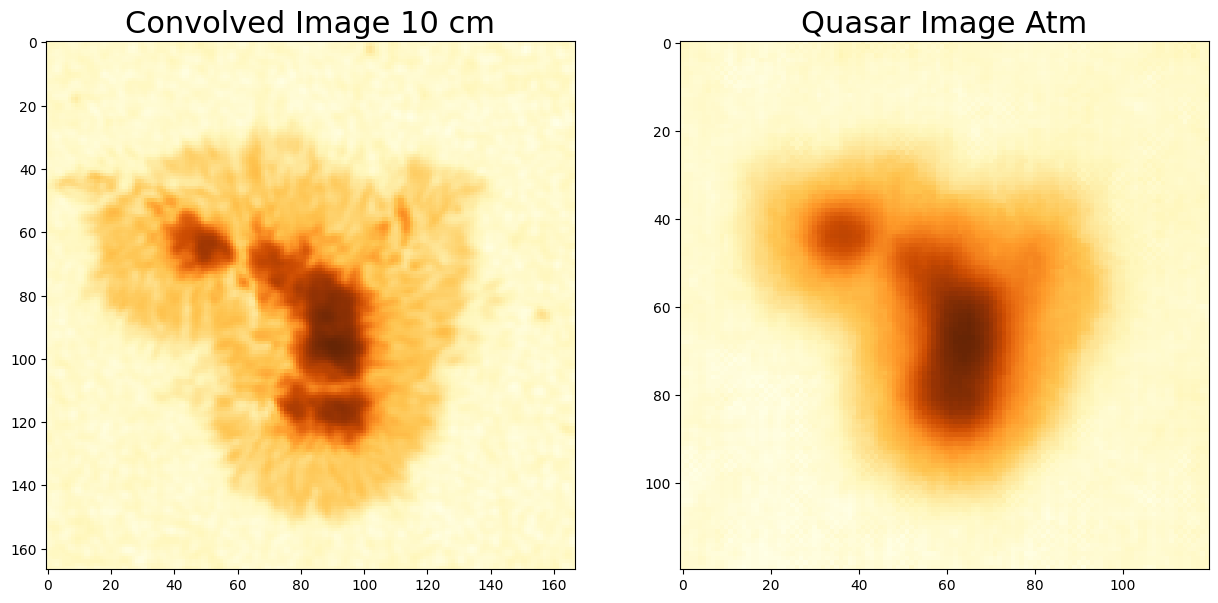

In [46]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.imshow(convolved_array[cut:len(convolved_array)-cut,cut:len(convolved_array)-cut],cmap='YlOrBr_r')
ax1.set_title('Convolved Image '+str(D)+' cm',fontsize=22)
ax2.imshow(im[int(y):int(y)+sq_lenght,int(x):int(x)+sq_lenght],cmap='YlOrBr_r')
ax2.set_title('Quasar Image Atm',fontsize=22)